### Define a function to optimize

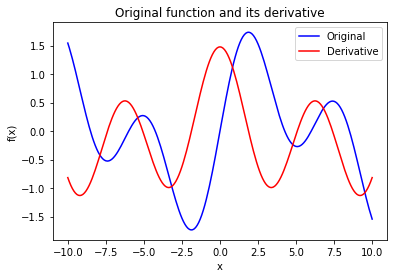

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Define the function to optimize
def f(x):
    return np.sin(x) + np.sin((10.0 / 21.0) * x)

# Determine its derivative
x = sp.symbols('x')
f_sym = sp.sin(x) + sp.sin((10.0 / 21.0) * x)
df_sym = sp.diff(f_sym, x)
df = sp.lambdify(x, df_sym, 'numpy')

# Sample the original and derivative function
x = np.arange(-10, 10.1, 0.1)
y = f(x)
dy = df(x)

# Plot these functions
plt.figure(figsize=(6, 4))
plt.title("Original function and its derivative")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y, c='b', label="Original")
plt.plot(x, dy, c='r', label="Derivative")
plt.legend()
plt.show()

### Gradient descent without momentum

In [2]:
def grad_desc(f, df, x, lr, iterations):
    points = list()

    for iteration in range(iterations):
        points.append(x)
        x = x - lr * df(x)

    return points


x_points = grad_desc(f, df, -10, 0.25, 50)

<IPython.core.display.Javascript object>


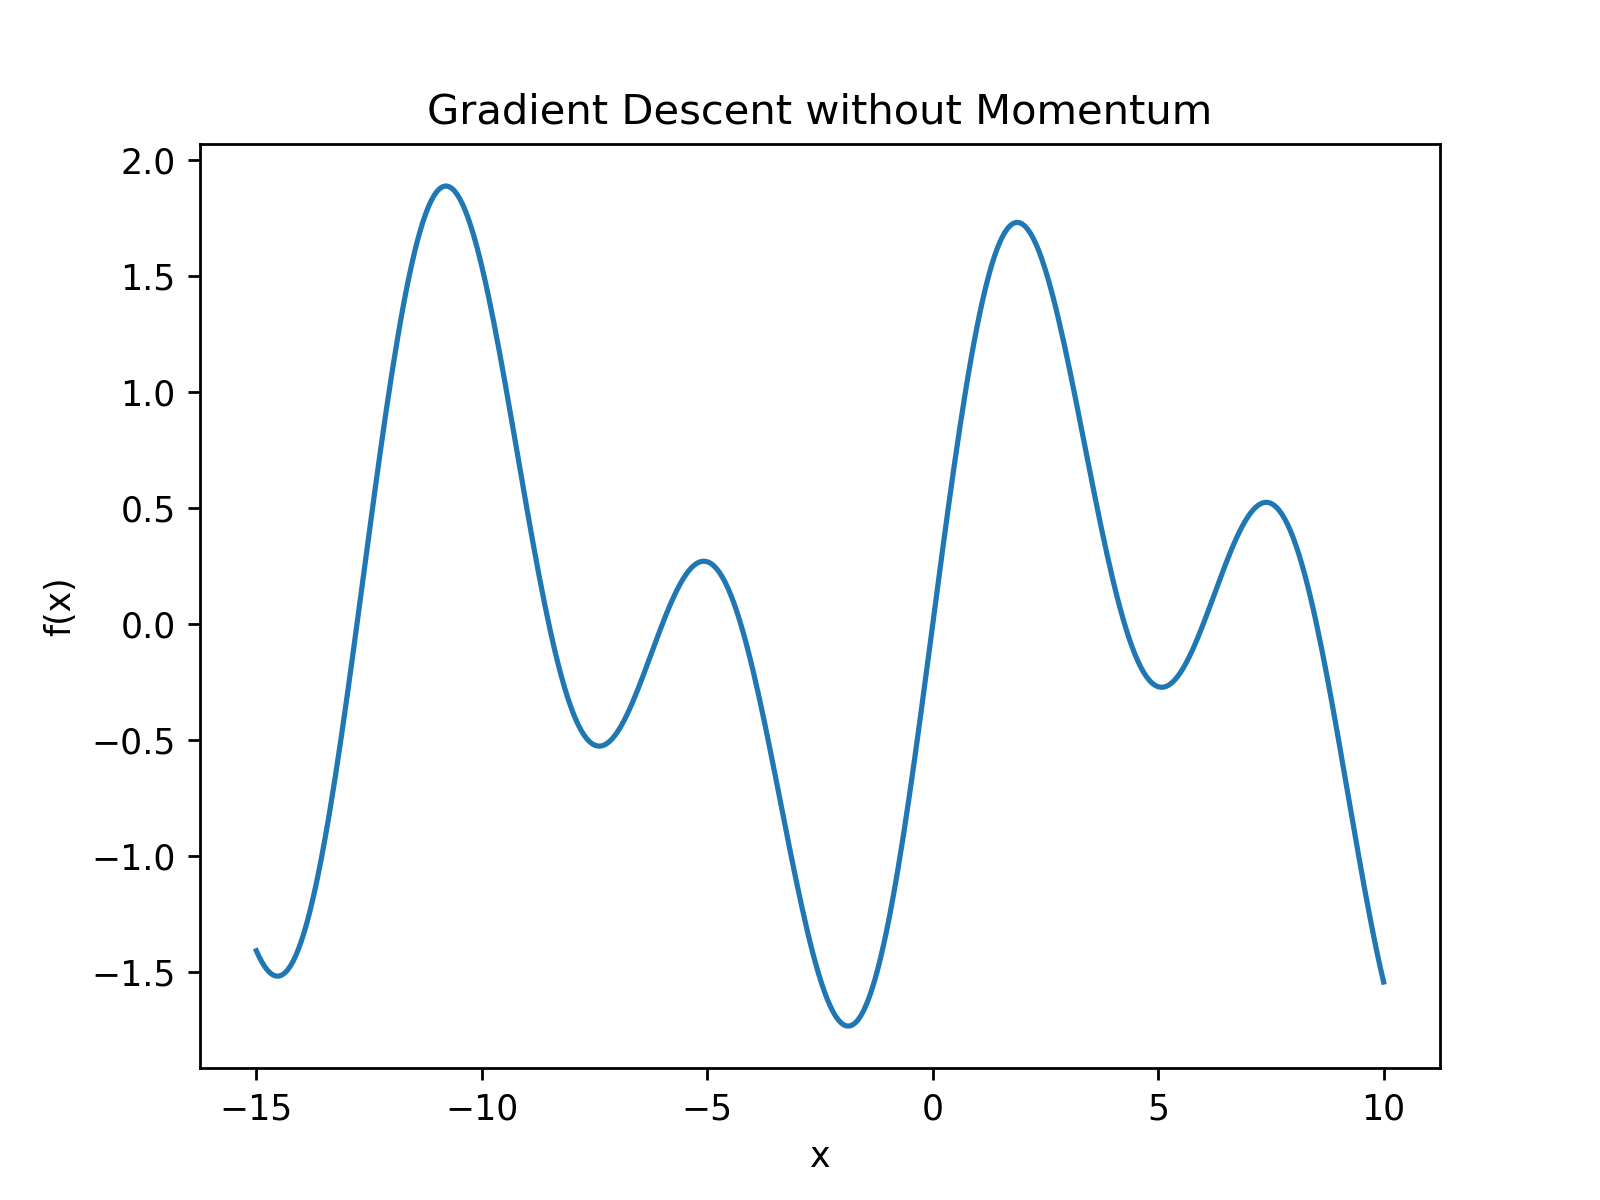

In [3]:
%matplotlib notebook

fig, ax = plt.subplots()
x_vals = np.linspace(-15, 10, 400)
y_vals = f(x_vals)
ax.plot(x_vals, y_vals)
line, = ax.plot([], [], 'ro')  # This will be updated during animation

# Initialize the animation
def init():
    line.set_data([], [])
    return line,

# Update the animation
def update(frame):
    x = x_points[frame]
    y = f(x)
    line.set_data(x, y)
    return line,

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(x_points), init_func=init, blit=True, interval=200)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent without Momentum')
plt.show()

### Gradient descent with momentum

In [4]:
def grad_desc(f, df, x, lr, iterations, momentum):
    points = list()
    v = 0
    
    for _ in range(iterations):
        points.append(x)
        v = momentum * v - lr * df(x)
        x = x + v

    return points


x_points = grad_desc(f, df, -10, 0.25, 50, 0.9)

<IPython.core.display.Javascript object>


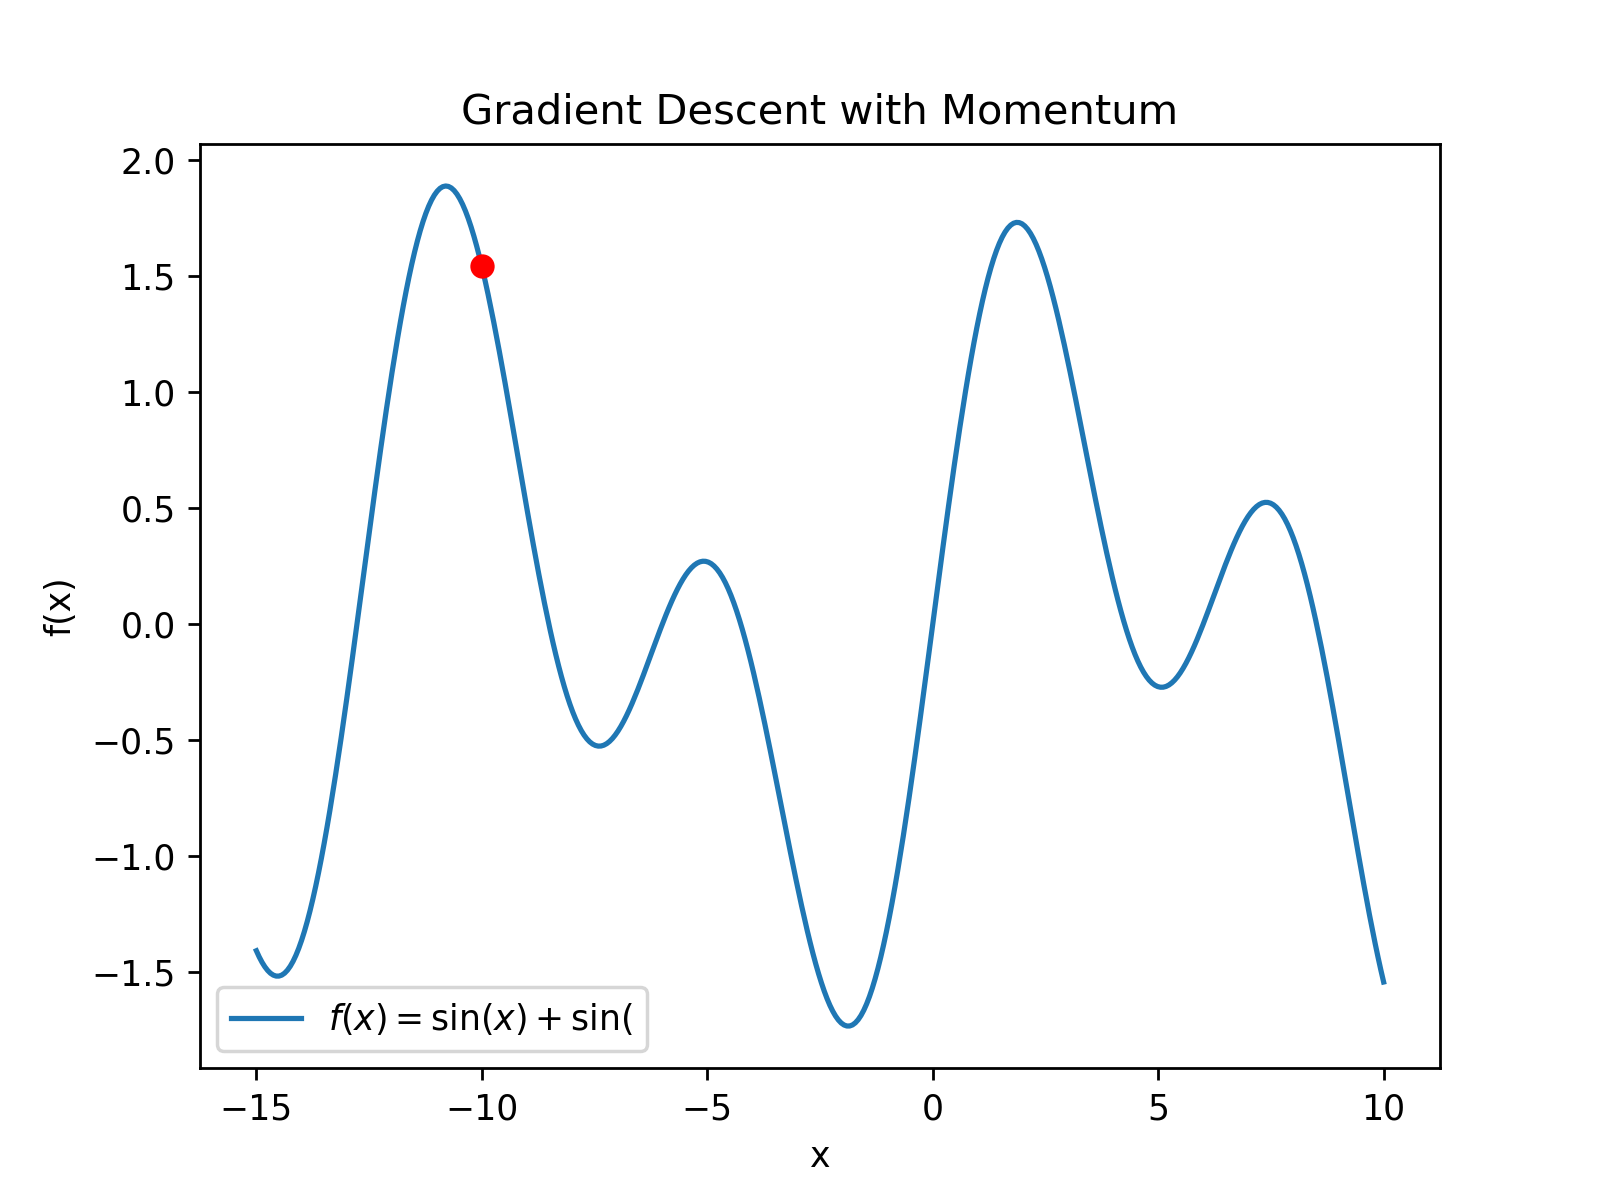

In [5]:
fig, ax = plt.subplots()
x_vals = np.linspace(-15, 10, 400)
y_vals = f(x_vals)
ax.plot(x_vals, y_vals, label='$f(x) = \sin(x) + \sin(\frac{10}{3}x)$')
line, = ax.plot([], [], 'ro')  # This will be updated during animation

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(x_points), init_func=init, blit=True, interval=200)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent with Momentum')
plt.legend()
plt.show()